# Assignment 2 - Machine Learning Basics

## *Xiao Lu*
Netid:  *xl294*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [69]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. A flexible method would perform better if the sample size $n$ is extremely large and the number of predictors $p$ is small. It is because when the sample size is large, the variance would only increase moderately while the bias would be minimized because the flexible method takes full advantage of the large sample.   
2. An inflexible method would perform better if the number of predictors is extremely large and the number of observations n is small. It is because the variance using a flexible method would increase rapidly if the sample size is too small. Although the bias is small, the limited sample size is prone to have overfitting issue if a flexible method is used.   
3. An flexible method could perform better if the relationship between the predictors and response is highly non-linear. Although an inflexible method (such as linear regression) would produce smaller variance, it might produce very large bias.   
4. An inflexible method would perform better if the variance of the error terms is extremely high. It is because a flexible method, though having smaller bias, would include the extremely high variance of the error terms, thus leading to a much larger variance.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) This is a regression problem focusing on inference. $n$ = 500, $p$ = 3.   
(b) This is a classification problem focusing on prediction. $n$ = 20, $p$ = 13.   
(c) This is a regression problem focusing on inference. $n$ = 52, $p$ = 3.


# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [70]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

**ANSWER**:

In [71]:
import numpy as np
X_test = np.zeros((6,3))
D_square = np.sum((X_test - X)**2, axis =1)
D = np.sqrt(D_square)
D_square

array([ 9.,  4., 10.,  5.,  2.,  3.])

**(a)** The table including the Euclidean Distance between each observation and the test point is shown below:

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   | $Euclidean\ Distance$ |
|------|-------|-------|-------|-------|----------------------|
| **1**| 0     | 3     | 0     | Red   | 3                    |
| **2**| 2     | 0     | 0     | Red   | 2                    |
| **3**| 0     | 1     | 3     | Red   | $\sqrt10$            |
| **4**| 0     | 1     | 2     | Blue  | $\sqrt5$             |
| **5**| -1    | 0     | 1     | Blue  | $\sqrt2$             |
| **6**| 1     | 1     | 1     | Red   | $\sqrt3$             |

**(b)** If $K$ = 1, then the predition is $Blue$ since the $5^{th}$ observation is the closest to the test point (0,0,0).   
**(c)** If $K$ = 3, then the predition is $Red$ since among the three closest observation($1^{st}$, $5^{th}$ and $6^{th}$), there are two observations with $y$ of $Red$.   
**(d)** Since the underlying true boundary is highly nonlinear, then we would expect the best value of $K$ to be small. It is because the larger the $K$ is, the smoother and more linear the boundary would be. And when $K$ is larger than the sample size, the boundary will be linear, leading to very high bias. 

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [72]:
# (a) Write your own kNN classifier
import numpy as np
from math import sqrt
from collections import Counter

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self,k):
        self.k = k
        self._X_train = None
        self._y_train = None
        
    def fit(self, X_train, y_train):
        # Save the training data to properties of this class
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."

        self._X_train = X_train
        self._y_train = y_train
        return self
    
    def _predict(self, x):
        """给定单个待预测数据x，返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"

        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
    
    def predict(self, X_predict):
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)


# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y_true,y_predict):
    nvalues = len(y_true)
    accuracy = np.sum(y_true == y_predict) / nvalues
    return accuracy

In [73]:
# (b)
x_train_low = np.genfromtxt("data/A2_X_train_low.csv", delimiter=',')
y_train_low = np.genfromtxt("data/A2_y_train_low.csv", delimiter=',')
x_train_high = np.genfromtxt("data/A2_X_train_high.csv", delimiter=',')
y_train_high = np.genfromtxt("data/A2_y_train_high.csv", delimiter=',')
x_test_low = np.genfromtxt("data/A2_X_test_low.csv", delimiter=',')
y_test_low = np.genfromtxt("data/A2_y_test_low.csv", delimiter=',')
x_test_high = np.genfromtxt("data/A2_X_test_high.csv", delimiter=',')
y_test_high = np.genfromtxt("data/A2_y_test_high.csv", delimiter=',')

In [74]:
# (c)
import time
start = time.time()

low_dim = Knn(k = 5)
low_dim.fit(x_train_low, y_train_low)
low_dim_y = low_dim.predict(x_test_low)

end = time.time()
end - start

print("Low dimension accuracy: ", accuracy(y_test_low, low_dim_y ))
print("time consumed: %.2f s" % (end - start))

start = time.time()

high_dim = Knn(k = 5)
high_dim.fit(x_train_high, y_train_high)
high_dim_y = high_dim.predict(x_test_high)

end = time.time()
end - start

print("High dimension accuracy: ", accuracy(y_test_high, high_dim_y))
print("time consumed: %.2f s" % (end - start))

Low dimension accuracy:  0.925
time consumed: 15.32 s
High dimension accuracy:  0.993
time consumed: 15.54 s


In [75]:
# (d)
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

low_dim = KNeighborsClassifier(n_neighbors = 5) 
low_dim.fit(x_train_low, y_train_low)
low_dim_y = low_dim.predict(x_test_low)

end = time.time()
end - start

print("Low dimension accuracy: ", accuracy(y_test_low, low_dim_y ))
print("time consumed: %.2f s" % (end - start))

start = time.time()

high_dim = KNeighborsClassifier(n_neighbors = 5) 
high_dim.fit(x_train_high, y_train_high)
high_dim_y = high_dim.predict(x_test_high)

end = time.time()
end - start

print("High dimension accuracy: ", accuracy(y_test_high, high_dim_y))
print("time consumed: %.2f s" % (end - start))
print('='*50)
print("Comparison Result: The time consumed using scikit learn is much smaller than the Knn that I wrote by myself.")

Low dimension accuracy:  0.925
time consumed: 0.07 s
High dimension accuracy:  0.993
time consumed: 0.33 s
Comparison Result: The time consumed using scikit learn is much smaller than the Knn that I wrote by myself.


(e) If the prediction process is slow, then it will require longer time to generate the prediction result. And this can be a disadvantage when prediction is needed as soon as possible. For example, in stock transaction, if an algorithm takes too long to predict, then the best deal might be taken by other competitors who use faster algorithm.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [77]:
# (a)
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
x, y = make_moons(n_samples = 1000, noise = 0.35, random_state=123)
x1 = x[:,0]
x2 = x[:,1]

Text(0, 0.5, 'x2')

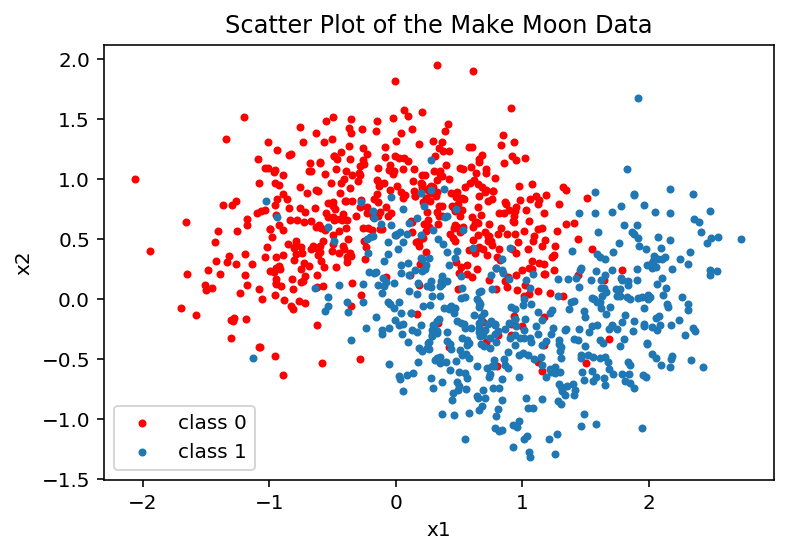

In [78]:
# (b)
import matplotlib.pyplot as plt
plt.scatter(x1[y==0], x2[y==0],color = 'r',marker = '.', label = 'class 0')
plt.scatter(x1[y==1], x2[y==1],marker = '.', label = 'class 1')
plt.title("Scatter Plot of the Make Moon Data")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

In [79]:
# (c)

sample1 = np.random.choice(1000, 100)
sample2 = np.random.choice(1000, 100)
sample3 = np.random.choice(1000, 100)

x_1 = x[sample1]
y_1 = y[sample1]

x_2 = x[sample2]
y_2 = y[sample2]

x_3 = x[sample3]
y_3 = y[sample3]

knn1 = KNeighborsClassifier(n_neighbors=1)
knn25 = KNeighborsClassifier(n_neighbors=25)
knn50 = KNeighborsClassifier(n_neighbors=50)

# 9 combinations
knn1_1 = knn1.fit(x_1, y_1)
knn1_2 = knn1.fit(x_2, y_2)
knn1_3 = knn1.fit(x_3, y_3)
knn25_1 = knn25.fit(x_1, y_1)
knn25_2 = knn25.fit(x_2, y_2)
knn25_3 = knn25.fit(x_3, y_3)
knn50_1 = knn50.fit(x_1, y_1)
knn50_2 = knn50.fit(x_2, y_2)
knn50_3 = knn50.fit(x_3, y_3)

In [80]:
# (d)
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
xx,yy = np.meshgrid(np.linspace(-2, 3, 100),np.linspace(-2, 3, 100))
k = [1,25,50]

Text(0.5, 0.98, 'Decision Boundaries for K = 1, 25, 50 on Three Random Samples')

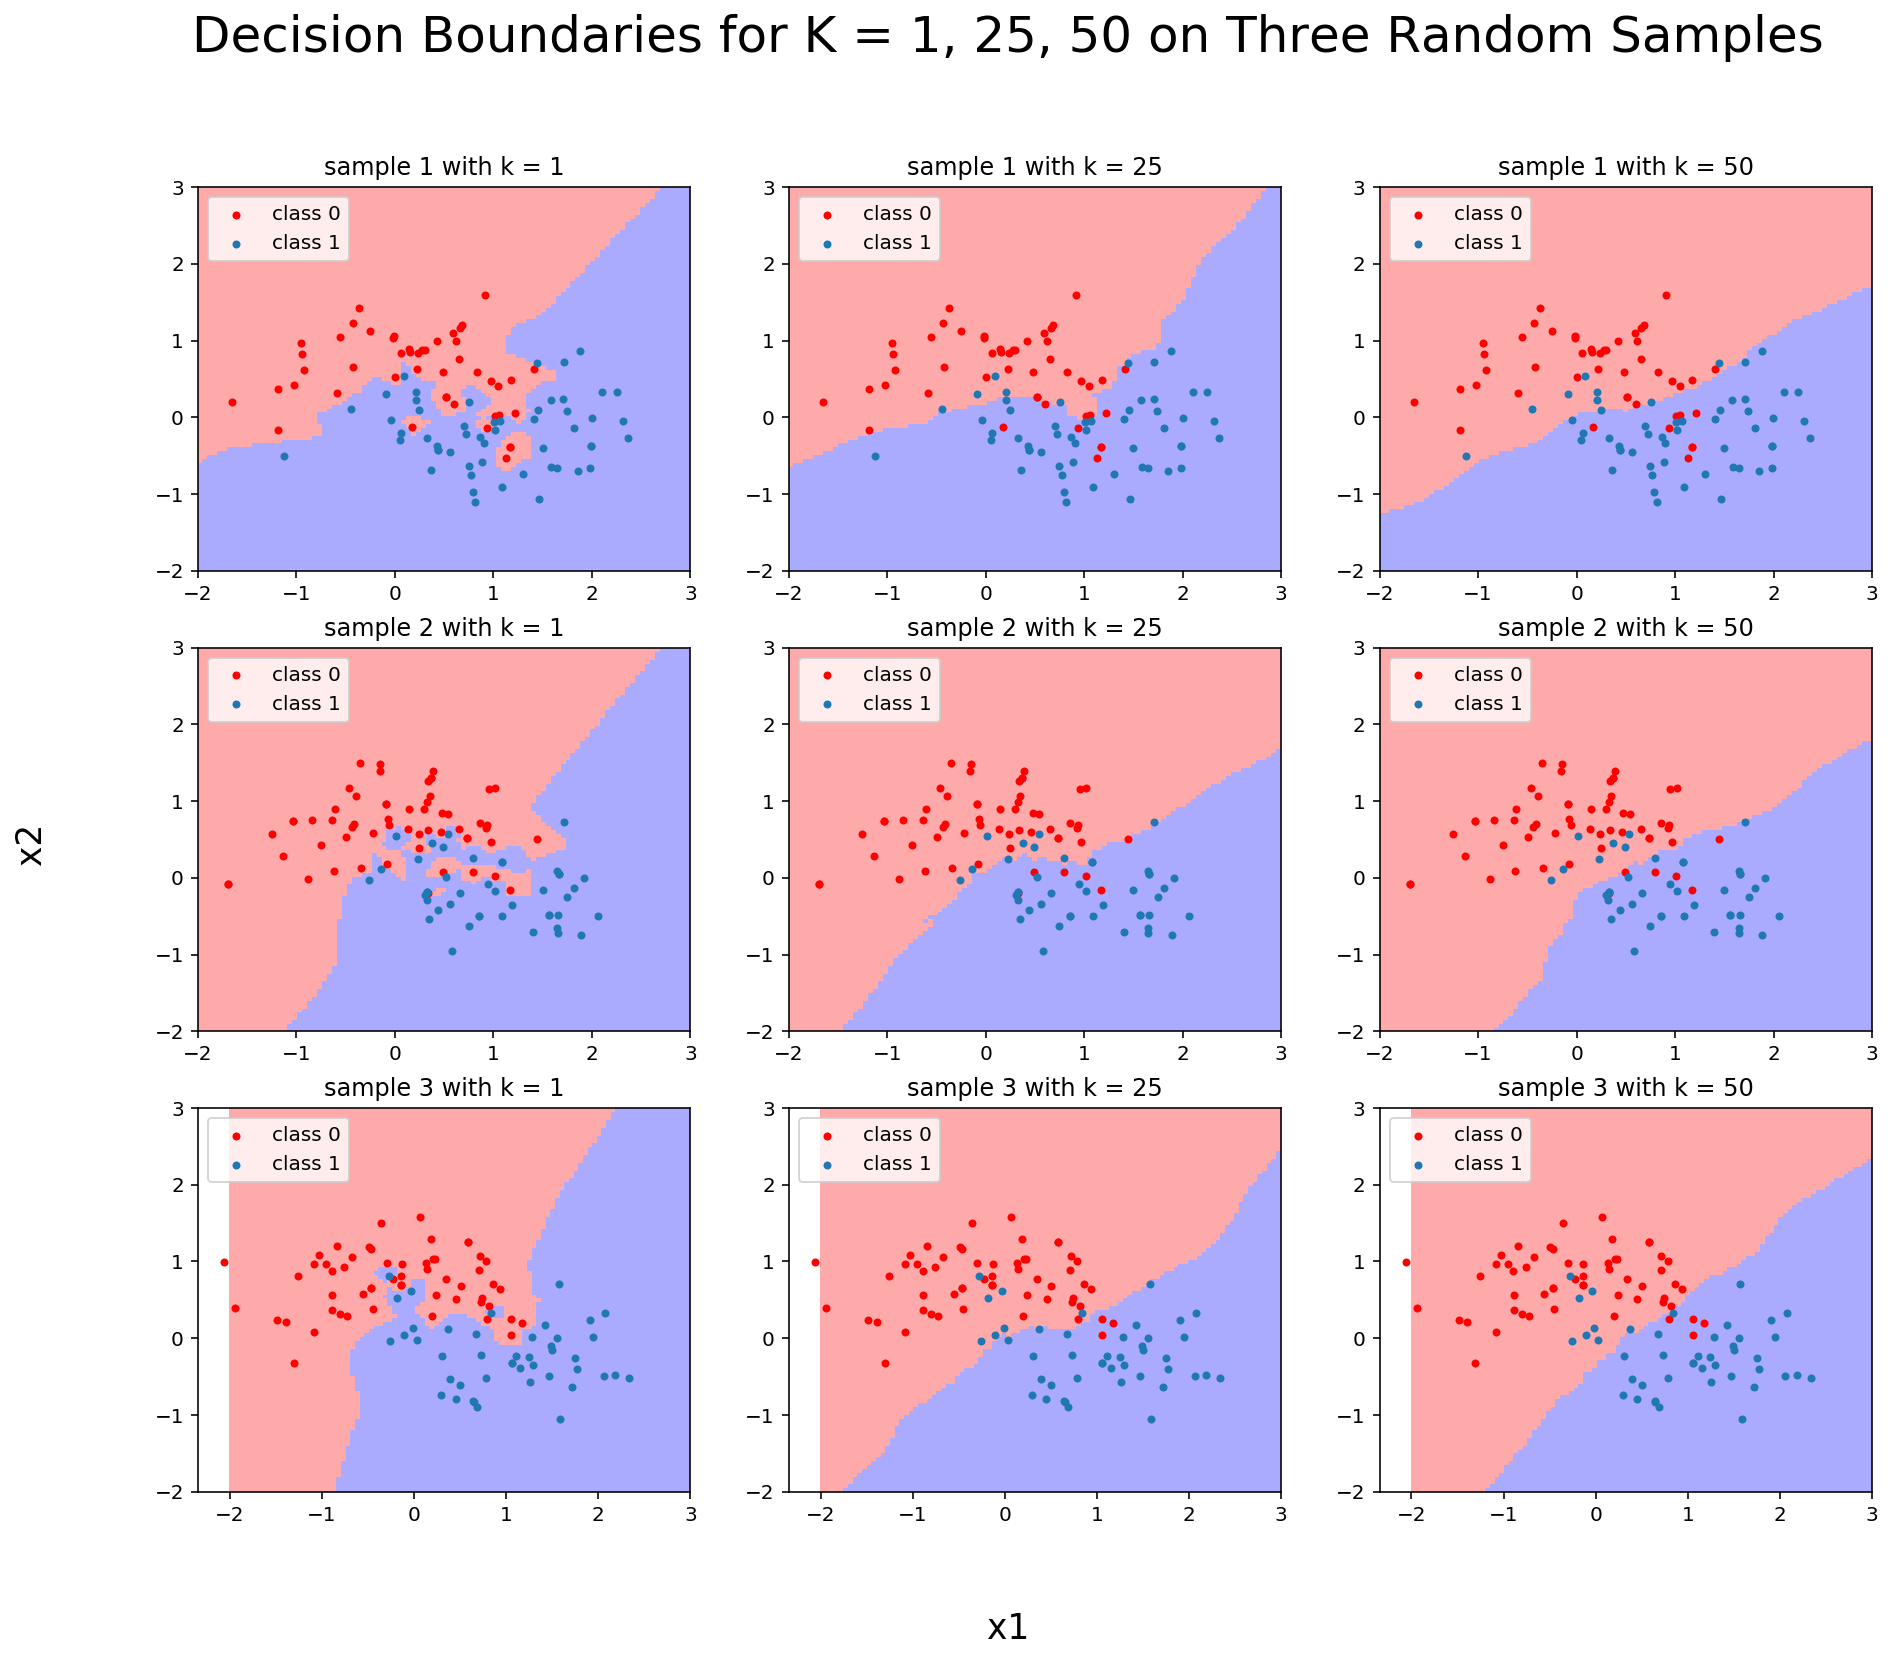

In [81]:
numRows, numCols = 3,3
fig, axs = plt.subplots(numRows, numCols, figsize = (15, 12))
for i in range(0,3):
    sample = np.random.choice(1000,100)
    x_sam = x[sample]
    #print(x_sam)
    y_sam = y[sample]
    #print(y_sam)
    for j in [0,1,2]:
        knn = KNeighborsClassifier(n_neighbors=k[j])
        knn.fit(x_sam, y_sam)
        Z = knn.predict(np.c_[xx.flatten(), yy.flatten()])
        Z = Z.reshape(xx.shape)
        axs[i,j].pcolormesh(xx, yy, Z, cmap=cmap_light) 
        axs[i,j].scatter(x_sam[:,0][y_sam==0], x_sam[:,1][y_sam==0],color = 'r',marker = '.', label = 'class 0',cmap=cmap_bold)
        axs[i,j].scatter(x_sam[:,0][y_sam==1], x_sam[:,1][y_sam==1],marker = '.', label = 'class 1',cmap=cmap_bold)
        axs[i,j].set_title("sample %d with k = %d" % (i+1, k[j]))
        axs[i,j].legend(loc='upper left')
fig.text(0.5, 0.04, 'x1', ha='center',size='xx-large')
fig.text(0.04, 0.5, 'x2', va='center', rotation='vertical',size='xx-large')
fig.suptitle("Decision Boundaries for K = 1, 25, 50 on Three Random Samples", fontsize = 25)

#### (e)
The pattern of plots in the first column is very different from those in the other two columns. Generally, when k increases, the pattern becomes smoother and less fragmented. When $k$ = 1, the decision boundaries seem to separate the class best, which indicates the lowest bias. Nevertheless, such a flexible method would bring larger variance when data change. When $k$ = 25, the decision boundaries seem to achieve a balance between bias and variance.

#### (f)
The bias–variance tradeoff is the property of a set of predictive models whereby models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples, and vice versa. In this case above, when $k$ increases, the model becomes less flexible which produce a smoother decision boundary to separate different classes. And the less flexible the model is, the more bias and less variance it will be. Therefore, 

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

Text(0, 0.5, 'x2_test')

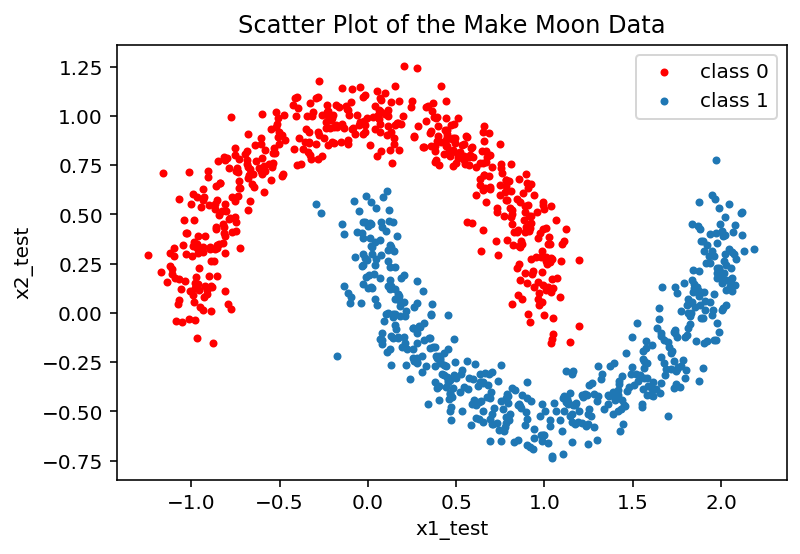

In [82]:
# (a)
x_test, y_test = make_moons(n_samples = 1000, noise = 0.1,random_state=123)
x1 = x[:,0]
x1_test = x_test[:,0]
x2_test = x_test[:,1]

plt.scatter(x1_test[y_test==0], x2_test[y_test==0],color = 'r',marker = '.', label = 'class 0')
plt.scatter(x1_test[y_test==1], x2_test[y_test==1],marker = '.', label = 'class 1')
plt.title("Scatter Plot of the Make Moon Data")
plt.legend()
plt.xlabel("x1_test")
plt.ylabel("x2_test")

In [83]:
# (b)
error = []
for k in range(1,501):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pre = knn.predict(x_test)
    err = 1 - np.sum(y_test == y_pre) / len(y_test)
    error.append(err)

Text(0, 0.5, 'Error Rate')

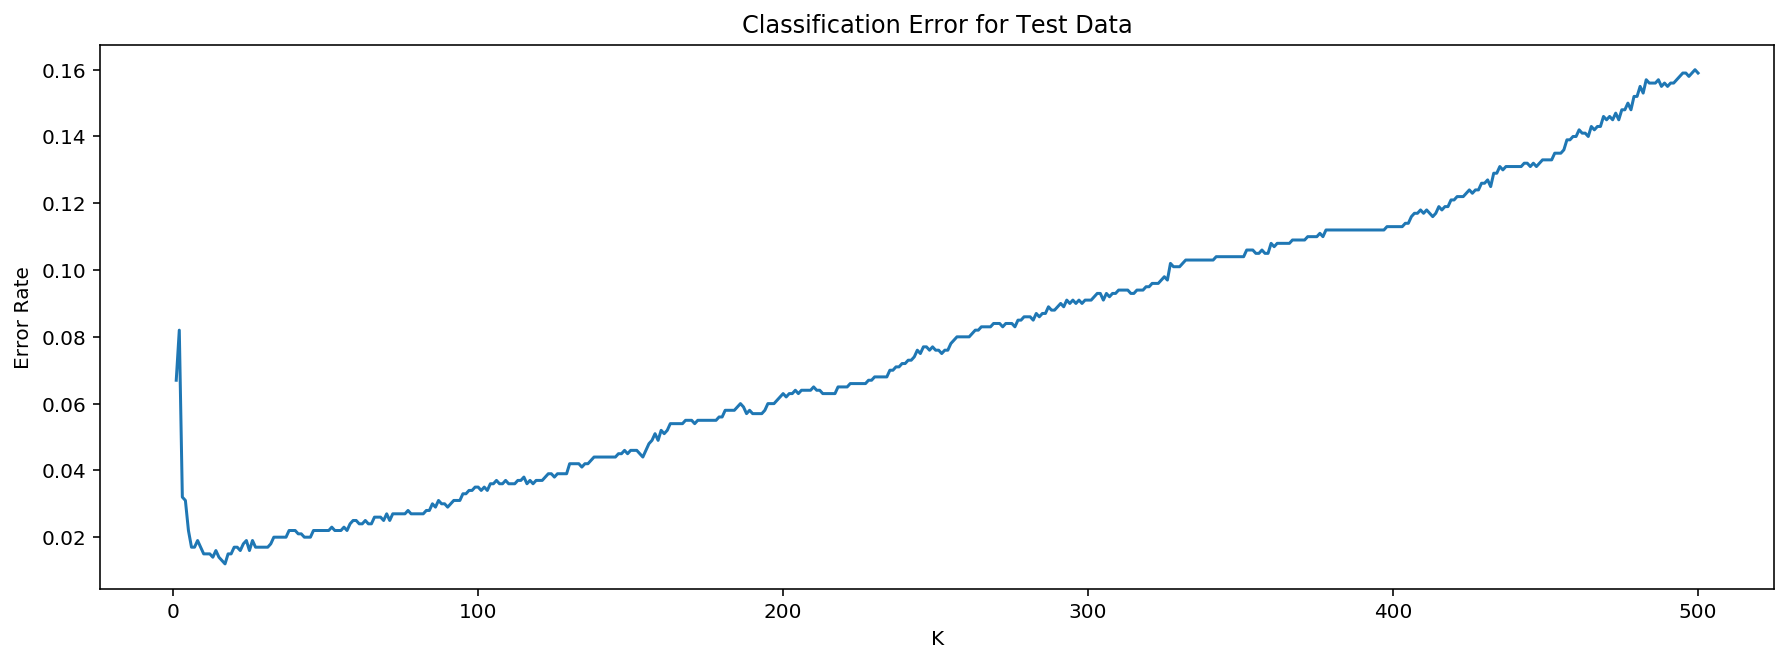

In [84]:
k = np.arange(1,501)
plt.figure(figsize = (15, 5))
plt.plot(k,error)
plt.title("Classification Error for Test Data")
plt.xlabel("K")
plt.ylabel("Error Rate")

#### (c)
The error rate decreases from k=1 to approximately k=17 and increases after k=17. The minimum point should be around k =17.

#### (d)
Generally, the smaller k is, the more flexible the model is. And when k = 1, the bias is the lowest and the variance is the highest. On the other hand, the bigger k is, the less flexible the model is. And when k = 500, the bias is the highest and the variance is the lowest.

In [85]:
# (e)
k[error == min(error)]

array([17])

#### (e)
The optimal value of k is 17 because the error rate when k = 17 is the smallest, which ensures the optimal predictive power on test data. Besides, 17 is not too small or too large so it will achieve a balance between bias and variance.

#### (f)
For linear regression model, the more predictors it includes, the more flexible the model will be, which means less bias and higher variance. And generally, the more restriction and inclusion of predictors in the model, the more flexible the model will be because it tries to fit the training data as best as possible.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

In [86]:
import pandas as pd
train_x = np.array(pd.read_csv("data/A2_Q7_train.csv", delimiter=','))[:,1].reshape(-1,1)
train_y = np.array(pd.read_csv("data/A2_Q7_train.csv", delimiter=','))[:,2].reshape(-1,1)
test_x = np.array(pd.read_csv("data/A2_Q7_test.csv", delimiter=','))[:,1].reshape(-1,1)
test_y = np.array(pd.read_csv("data/A2_Q7_test.csv", delimiter=','))[:,2].reshape(-1,1)

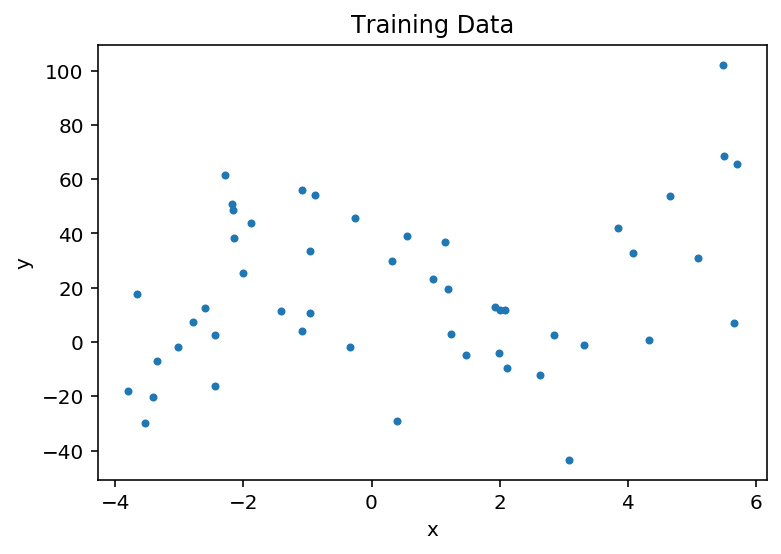

In [87]:
# (a)
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, marker='.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

In [88]:
# (b)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

print('='*10+'Simple Linear Regression'+'='*10)
linreg.fit(train_x, train_y)
print("Regression Model: y = %.2f + %.2f * x" % (linreg.intercept_, linreg.coef_))
print('The R sqaure is: %f' %linreg.score(train_x, train_y))
print("The Mean Square Error is: %.2f" %(np.mean((linreg.predict(train_x)-train_y)**2)))

==========Simple Linear Regression==========
Regression Model: y = 17.20 + 2.59 * x
The R sqaure is: 0.064861
The Mean Square Error is: 791.42


In [89]:
# (c)
print('='*10+'cos transformation'+'='*10)
linreg_1 = LinearRegression()
train_x_cos = np.cos((train_x+2)*(np.pi/4))
linreg_1.fit(train_x_cos, train_y)
print("Regression Model: y = %.2f + %.2f * cos((x+2) *(pi/4))" % (linreg_1.intercept_, linreg_1.coef_))
print('The R sqaure is: %f' %linreg_1.score(train_x_cos, train_y))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_1.predict(train_x_cos)-train_y)**2)))

print('='*10+'log transformation'+'='*10)
linreg_2 = LinearRegression()
train_x_log = np.log(train_x+4)
linreg_2.fit(train_x_log, train_y)
print("Regression Model: y = %.2f + %.2f * log(x+4)" % (linreg_2.intercept_, linreg_2.coef_))
print('The R sqaure is: %f' % (linreg_2.score(train_x_log, train_y)))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_2.predict(train_x_log)-train_y)**2)))

print('='*10+'inverse transformation'+'='*10)
linreg_3 = LinearRegression()
train_x_inverse = (1/train_x)
linreg_3.fit(train_x_inverse, train_y)
print("Regression Model: y = %.2f + %.2f * (1/x)" % (linreg_3.intercept_, linreg_3.coef_))
print('The R sqaure is: %f' % (linreg_3.score(train_x_inverse, train_y)))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_3.predict(train_x_inverse)-train_y)**2)))

print('='*10+'square'+'='*10)
linreg_4 = LinearRegression()
train_x_square = (train_x)**2
linreg_4.fit(train_x_square, train_y)
print("Regression Model: y = %.2f + %.2f * x^2" % (linreg_4.intercept_, linreg_4.coef_))
print('The R sqaure is: %f' % (linreg_4.score(train_x_square, train_y)))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_4.predict(train_x_square)-train_y)**2)))

print('='*10+'triple'+'='*10)
linreg_5 = LinearRegression()
train_x_triple = (train_x)**3
linreg_5.fit(train_x_square, train_y)
print("Regression Model: y = %.2f + %.2f * x^3" % (linreg_5.intercept_, linreg_5.coef_))
print('The R sqaure is: %f' % (linreg_5.score(train_x_triple, train_y)))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_5.predict(train_x_triple)-train_y)**2)))

print('='*10+'4th'+'='*10)
linreg_6 = LinearRegression()
train_x_4th = (train_x)**4
linreg_6.fit(train_x_square, train_y)
print("Regression Model: y = %.2f + %.2f * x^4" % (linreg_6.intercept_, linreg_6.coef_))
print('The R sqaure is: %f' % (linreg_6.score(train_x_4th, train_y)))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_6.predict(train_x_4th)-train_y)**2)))

print('\n'+'*'*10+' Best Option: added with cos transformation '+'*'*10)
linreg_cos = LinearRegression()
train_x_cos = np.cos((train_x+2)*(np.pi/4))
train_X = np.c_[train_x, train_x_cos]
linreg_cos.fit(train_X, train_y)
print("Regression Model: y = %.2f + %.2f * x + %.2f * cos((x+2) *(pi/4))" % (linreg_cos.intercept_, linreg_cos.coef_[(0,0)],linreg_cos.coef_[(0,1)]))
print('The R sqaure is: %f' %linreg_cos.score(train_X, train_y))
print("The Mean Square Error is: %.2f" %(np.mean((linreg_cos.predict(train_X)-train_y)**2)))

==========cos transformation==========
Regression Model: y = 15.51 + 15.64 * cos((x+2) *(pi/4))
The R sqaure is: 0.156694
The Mean Square Error is: 713.70
==========log transformation==========
Regression Model: y = 7.80 + 8.98 * log(x+4)
The R sqaure is: 0.081886
The Mean Square Error is: 777.01
==========inverse transformation==========
Regression Model: y = 18.29 + -3.35 * (1/x)
The R sqaure is: 0.015188
The Mean Square Error is: 833.46
==========square==========
Regression Model: y = 11.27 + 0.85 * x^2
The R sqaure is: 0.068217
The Mean Square Error is: 788.58
==========triple==========
Regression Model: y = 11.27 + 0.85 * x^3
The R sqaure is: -1.370621
The Mean Square Error is: 2006.28
==========4th==========
Regression Model: y = 11.27 + 0.85 * x^4
The R sqaure is: -76.056718
The Mean Square Error is: 65213.83

********** Best Option: added with cos transformation **********
Regression Model: y = 12.48 + 4.38 * x + 21.21 * cos((x+2) *(pi/4))
The R sqaure is: 0.321987
The Mean Squ

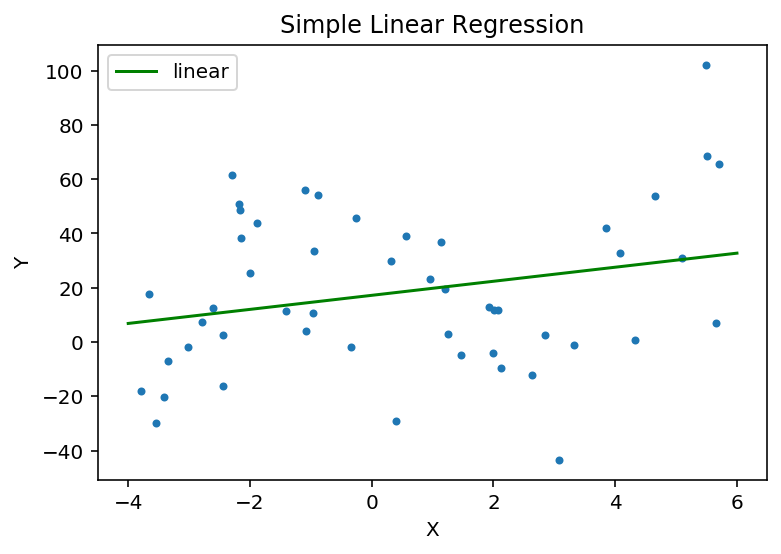

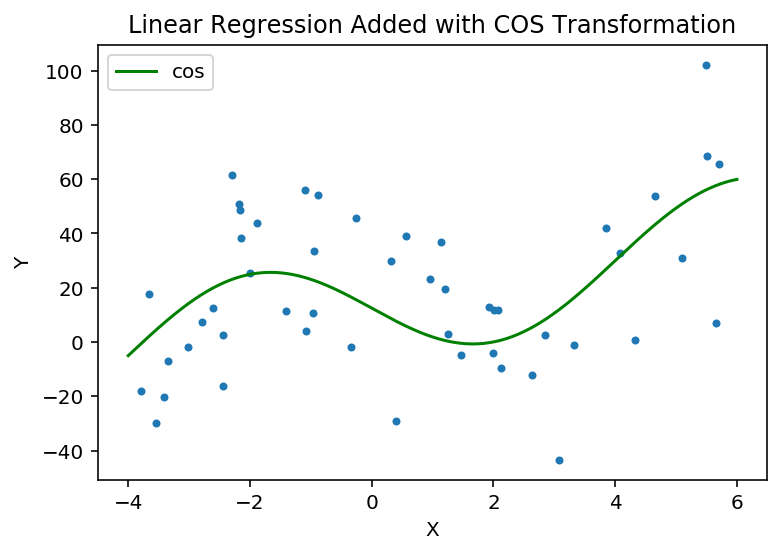

In [90]:
# (d)
grid = np.linspace(-4, 6, 1000).reshape(1000,1)
plt.scatter(train_x, train_y, marker='.')
linreg.fit(train_x, train_y)
predict_y = linreg.predict(grid)
plt.plot(grid, predict_y, '-g', label = "linear")
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

grid = np.linspace(-4, 6, 1000).reshape(1000,1)
grid_cos = np.cos((grid+2)*(np.pi/4))
grid_X = np.c_[grid, grid_cos]
plt.scatter(train_x, train_y, marker='.')
predict_y_cos = linreg_cos.predict(grid_X)
plt.plot(grid, predict_y_cos, '-g', label = "cos")
plt.title("Linear Regression Added with COS Transformation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [91]:
# (e)
print('='*10+'Simple Linear Regression'+'='*10)
print('The R sqaure of test data is: %f' %linreg.score(test_x, test_y))
print("The Mean Square Error of test data is: %.2f" %(np.mean((linreg.predict(test_x)-test_y)**2)))

print('='*10+'Added with cos transformation'+'='*10)
test_x_cos = np.cos((test_x+2)*(np.pi/4))
test_X = np.c_[test_x, test_x_cos]
print('The R sqaure of test data is: %f' %linreg_cos.score(test_X, test_y))
print("The Mean Square Error of test data is: %.2f" %(np.mean((linreg_cos.predict(test_X)-test_y)**2)))



==========Simple Linear Regression==========
The R sqaure of test data is: -0.132899
The Mean Square Error of test data is: 1116.66
==========Added with cos transformation==========
The R sqaure of test data is: -0.014270
The Mean Square Error of test data is: 999.73


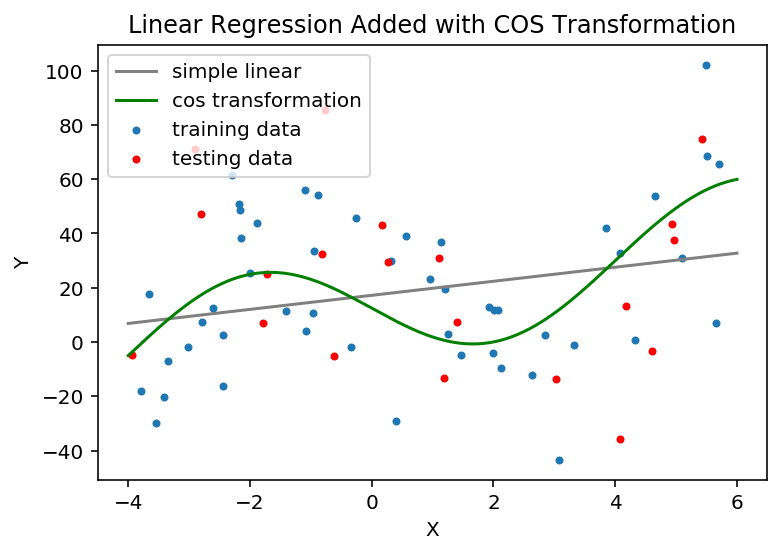

In [92]:
# (f)
grid = np.linspace(-4, 6, 1000).reshape(1000,1)
grid_cos = np.cos((grid+2)*(np.pi/4))
grid_X = np.c_[grid, grid_cos]

plt.scatter(train_x, train_y, marker='.', label = 'training data')
plt.scatter(test_x, test_y, marker='.', color='r', label = 'testing data')

plt.plot(grid, predict_y, 'gray', label = "simple linear")
plt.plot(grid, predict_y_cos, '-g', label = "cos transformation")
plt.title("Linear Regression Added with COS Transformation")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc = 2)
plt.show()

#### (f)
The model with cos transformation performs better on training data because the training data has a similar trend with cosine functions and this similarity is well-captured by the cos transformation of x, which increases the R square from 0.156 to 0.321.

Both of these two models perform not so good in test data with a negative R square, which indicates a worse accuracy than just draw a line for the average of Y. It might due to the lack of obvious pattern seen in the test data so the original cos transformation cannot capture the underlying pattern of the test data very well.

#### (e)
If the test data is significantly different from the training data, then no matter how perfectly the model fits the training data, the predictive power of the model on test data will be very limited. Because the original underlying pattern of the training data captured by the model does not exist in the test data. Thus, a model with very high R square and low MSE on training data will not work very well with a completely different test data.